#### STEP 0: Import the necessary packages/algorithms.

In [46]:
# General analysis/plotting packages:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import stats
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
from collections import Counter

# Specific t-SNE/visualization packages:
from sklearn.manifold import TSNE
from shapely.geometry import Point, Polygon

#### STEP 1: Load in the M3 datafile. 

This example uses APOGEE DR17 data (https://www.sdss.org/dr17/) with astroNN chemical abundances (https://astronn.readthedocs.io/en/latest/) and includes all stars that are within a 10x10 degree field of view around M3's centre.

In [47]:
# M3 = pd.read_csv('data/APOGEEDR17_GAIAEDR3_filter.csv', delimiter=',')
M3 = pd.read_csv('../tsne_umap_tutorials/data/APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

# M3 = pd.read_csv('data/M3data_10x10.csv', delimiter=',')

# Spatial:
ra = M3["RA"]   #APOGEE
dec = M3["DEC"]   #APOGEE

# Identification:
apogee_ID = M3["# APOGEE_ID_"]   #APOGEE
gaia_ID = M3["GAIAEDR3_SOURCE_ID"]  # Gaia

# Kinematic:
parallax = M3["GAIAEDR3_PARALLAX"]  # Gaia
pmra = M3["GAIAEDR3_PMRA"]  # Gaia
pmra_err = M3["GAIAEDR3_PMRA_ERROR"]  # Gaia
pmdec = M3["GAIAEDR3_PMDEC"]  # Gaia
pmdec_err = M3["GAIAEDR3_PMDEC_ERROR"]  # Gaia
RV = M3["GAIAEDR3_DR2_RADIAL_VELOCITY"]   #APOGEE
RV_err = M3["GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR"]   #APOGEE
# FIX THISL ATER
dist = M3["STARFLAG"]   #APOGEE
dist_err = M3["STARFLAG"]   #APOGEE
# FIX THIS LATER
jr = M3["jr"]   #APOGEE
jr_err = M3["jr_err"]   #APOGEE
jz = M3["jz"]   #APOGEE
jz_err = M3["jz_err"]   #APOGEE
### check these!
jphi = M3["Lz"]   #APOGEE
jphi_err = M3["Lz_err"]    #APOGEE
###


# Spectral (useful for filtering):
TEFF_ERR = M3["TEFF_ERR"]   #APOGEE
TEFF = M3["TEFF"]   #APOGEE
LOGG_ERR = M3["LOGG_ERR"]   #APOGEE
LOGG = M3["LOGG"]   #APOGEE
SNR = M3["SNR"]   #APOGEE

# Chemical abundances from astroNN:
FE_H = M3['FE_H'] 
C_FE = M3['C_FE']
CI_FE = M3['CI_FE']
N_FE = M3['N_FE']
O_FE = M3['O_FE']
MG_FE = M3['MG_FE']
AL_FE = M3['AL_FE']
SI_FE = M3['SI_FE']
P_FE = M3['P_FE']
S_FE = M3['S_FE']
K_FE = M3['K_FE']
CA_FE = M3['CA_FE']
TI_FE = M3['TI_FE']
TIII_FE = M3['TIII_FE']
V_FE = M3['V_FE']
CR_FE = M3['CR_FE']
MN_FE = M3['MN_FE']
CO_FE = M3['CO_FE']
NI_FE = M3['NI_FE']

# Chemical abundance errors from astroNN:
FE_H_err = M3["FE_H_ERR"] 
C_FE_err = M3['C_FE_ERR']
CI_FE_err = M3['CI_FE_ERR']
N_FE_err = M3['N_FE_ERR']
O_FE_err = M3['O_FE_ERR']
MG_FE_err = M3['MG_FE_ERR']
AL_FE_err = M3['AL_FE_ERR']
SI_FE_err = M3['SI_FE_ERR']
P_FE_err = M3['P_FE_ERR']
S_FE_err = M3['S_FE_ERR']
K_FE_err = M3['K_FE_ERR']
CA_FE_err = M3['CA_FE_ERR']
TI_FE_err = M3['TI_FE_ERR']
TIII_FE_err = M3['TIII_FE_ERR']
V_FE_err = M3['V_FE_ERR']
CR_FE_err = M3['CR_FE_ERR']
MN_FE_err = M3['MN_FE_ERR']
CO_FE_err = M3['CO_FE_ERR']
NI_FE_err = M3['NI_FE_ERR']

# Number of stars in the initial sample of APOGEE DR16: 
print("There are {} stars in our initial sample".format(len(ra)))

cols = [ra, dec, apogee_ID, gaia_ID, parallax, pmra, pmra_err, pmdec, pmdec_err, RV, RV_err, dist, dist_err,
        jr, jr_err, jphi, jphi_err, jz, jz_err, TEFF, TEFF_ERR, LOGG, LOGG_ERR, SNR, FE_H, FE_H_err, C_FE, 
        C_FE_err, CI_FE, CI_FE_err, N_FE, N_FE_err, O_FE, O_FE_err, MG_FE, MG_FE_err, AL_FE, AL_FE_err, SI_FE,
        SI_FE_err, P_FE, P_FE_err, S_FE, S_FE_err, K_FE, K_FE_err, CA_FE, CA_FE_err, TI_FE, TI_FE_err, TIII_FE,
        TIII_FE_err, V_FE, V_FE_err, CR_FE, CR_FE_err, MN_FE, MN_FE_err, CO_FE, CO_FE_err, NI_FE, NI_FE_err]

There are 370060 stars in our initial sample


In [48]:
M3 = pd.read_csv('data/M3data_10x10.csv', delimiter=',')

# Spatial:
ra = M3["ra"]   #APOGEE
dec = M3["dec"]   #APOGEE

# Identification:
apogee_ID = M3["apogee_ID"]   #APOGEE
gaia_ID = M3["gaia_ID"]  # Gaia

# Kinematic:
parallax = M3["parallax"]  # Gaia
pmra = M3["pmra"]  # Gaia
pmra_err = M3["pmra_err"]  # Gaia
pmdec = M3["pmdec"]  # Gaia
pmdec_err = M3["pmdec_err"]  # Gaia
RV = M3["RV"]   #APOGEE
RV_err = M3["RV_err"]   #APOGEE
dist = M3["dist"]   #APOGEE
dist_err = M3["dist_err"]   #APOGEE
jr = M3["jr"]   #APOGEE
jr_err = M3["jr_err"]   #APOGEE
jz = M3["jz"]   #APOGEE
jz_err = M3["jz_err"]   #APOGEE
jphi = M3["jphi"]   #APOGEE
jphi_err = M3["jphi_err"]    #APOGEE

# Spectral (useful for filtering):
TEFF_ERR = M3["TEFF_err"]   #APOGEE
TEFF = M3["TEFF"]   #APOGEE
LOGG_ERR = M3["LOGG_err"]   #APOGEE
LOGG = M3["LOGG"]   #APOGEE
SNR = M3["SNR"]   #APOGEE

# Chemical abundances from astroNN:
FE_H = M3['FEH'] 
C_FE = M3['CFE']
CI_FE = M3['CIFE']
N_FE = M3['NFE']
O_FE = M3['OFE']
MG_FE = M3['MGFE']
AL_FE = M3['ALFE']
SI_FE = M3['SIFE']
P_FE = M3['PFE']
S_FE = M3['SFE']
K_FE = M3['KFE']
CA_FE = M3['CAFE']
TI_FE = M3['TIFE']
TIII_FE = M3['TIIIFE']
V_FE = M3['VFE']
CR_FE = M3['CRFE']
MN_FE = M3['MNFE']
CO_FE = M3['COFE']
NI_FE = M3['NIFE']

# Chemical abundance errors from astroNN:
FE_H_err = M3["FEH_err"] 
C_FE_err = M3['CFE_err']
CI_FE_err = M3['CIFE_err']
N_FE_err = M3['NFE_err']
O_FE_err = M3['OFE_err']
MG_FE_err = M3['MGFE_err']
AL_FE_err = M3['ALFE_err']
SI_FE_err = M3['SIFE_err']
P_FE_err = M3['PFE_err']
S_FE_err = M3['SFE_err']
K_FE_err = M3['KFE_err']
CA_FE_err = M3['CAFE_err']
TI_FE_err = M3['TIFE_err']
TIII_FE_err = M3['TIIIFE_err']
V_FE_err = M3['VFE_err']
CR_FE_err = M3['CRFE_err']
MN_FE_err = M3['MNFE_err']
CO_FE_err = M3['COFE_err']
NI_FE_err = M3['NIFE_err']

# Number of stars in the initial sample of APOGEE DR16: 
print("There are {} stars in our initial sample".format(len(ra)))

cols = [ra, dec, apogee_ID, gaia_ID, parallax, pmra, pmra_err, pmdec, pmdec_err, RV, RV_err, dist, dist_err,
        jr, jr_err, jphi, jphi_err, jz, jz_err, TEFF, TEFF_ERR, LOGG, LOGG_ERR, SNR, FE_H, FE_H_err, C_FE, 
        C_FE_err, CI_FE, CI_FE_err, N_FE, N_FE_err, O_FE, O_FE_err, MG_FE, MG_FE_err, AL_FE, AL_FE_err, SI_FE,
        SI_FE_err, P_FE, P_FE_err, S_FE, S_FE_err, K_FE, K_FE_err, CA_FE, CA_FE_err, TI_FE, TI_FE_err, TIII_FE,
        TIII_FE_err, V_FE, V_FE_err, CR_FE, CR_FE_err, MN_FE, MN_FE_err, CO_FE, CO_FE_err, NI_FE, NI_FE_err]

There are 5289 stars in our initial sample


#### STEP 2: Filter the data. 

First, we remove all stars without proper motions and chemical abundances for all 19 elements. Next, for stars with multiple spectra, we select the one with the highest SNR to represent the source. Finally, we remove all stars with low signal-to-noise (SNR) ratios. 

In [49]:
### Filter 1: Remove stars that do not have proper motion values. ###
pm_filter_nan = np.isnan(pmra)
pm_filter = np.where(pm_filter_nan==False)
data_pmfilter = []
for i in cols:
    x = np.array(i)[pm_filter]
    data_pmfilter.append(x)
print("There are {} stars in our sample after the proper motion filtering.".format(len(data_pmfilter[0])))

### Filter 2: Remove stars that do not have data for all 19 abundances. ###
abundance_filter = np.where((data_pmfilter[24] > -9999) & (data_pmfilter[26] > -9999) & (data_pmfilter[28]  > -9999)
                            & (data_pmfilter[30]  > -9999) & (data_pmfilter[32]  > -9999) & (data_pmfilter[34]  > -9999)
                            & (data_pmfilter[36]  > -9999) & (data_pmfilter[38]  > -9999) & (data_pmfilter[40]  > -9999)
                            & (data_pmfilter[42]  > -9999) & (data_pmfilter[44]  > -9999) & (data_pmfilter[46]  > -9999)
                            & (data_pmfilter[48]  > -9999) & (data_pmfilter[50]  > -9999) & (data_pmfilter[52]  > -9999)
                            & (data_pmfilter[54]  > -9999) & (data_pmfilter[56]  > -9999) & (data_pmfilter[58]  > -9999)
                            & (data_pmfilter[60]  > -9999))

data_abundancefilter = []
for i in data_pmfilter:
    y = np.array(i)[abundance_filter]
    data_abundancefilter.append(y)
print("There are {} stars in our sample after the abundance filtering.".format(len(data_abundancefilter[0])))

### Filter 3: Remove all duplicate spectra (i.e. select spectra with highest SNR for multiple measurements). ###
d =  Counter(data_abundancefilter[0])
duplicates = [k for k, v in d.items() if v > 1]
a_list = np.array(range(0, len(duplicates)))
max_SNR_array = []

for i in a_list:
    indices = np.where(data_abundancefilter[0] == duplicates[i])
    snr_val = data_abundancefilter[23][indices]
    maximum = max(snr_val)
    index_maximum = np.where((data_abundancefilter[0] == duplicates[i]) & (data_abundancefilter[23] == maximum))
    index_maximum = int(index_maximum[0])
    max_SNR_array.append(index_maximum)

idx_sort = np.argsort(data_abundancefilter[0])
sorted_ra_array = data_abundancefilter[0][idx_sort]
vals, idx_start, count = np.unique(sorted_ra_array, return_counts=True, return_index=True)
res = np.split(idx_sort, idx_start[1:])
vals = vals[count == 1]
listtest =  np.array(range(0, len(vals)))

unique_array = []
for i in listtest:
    unique_val = np.where(vals[i] == data_abundancefilter[0])
    unique_val = int(unique_val[0])
    unique_array.append(unique_val)
    
#print("There are {} stars that do not have duplicate spectra.".format(len(unique_array)))
#print("There are {} stars that have multiple spectra, in which we select highest SNR.".format(len(max_SNR_array)))

duplicates_filter = np.concatenate((np.array(unique_array, dtype=np.int32), np.array(max_SNR_array, dtype=np.int32)), dtype=np.int32)
sortedarray = np.sort(duplicates_filter)

data_duplicatesfilter = []
for i in data_abundancefilter:
    z = np.array(i)[duplicates_filter]
    data_duplicatesfilter.append(z)

print("There are {} stars in our sample after removing sources with duplicate spectra.".format(len(data_duplicatesfilter[0])))

### Filter 4: Remove all stars with low SNR. ###
SNR_filter = np.where(data_duplicatesfilter[23] > 50)
data_snrfilter = []
for i in data_duplicatesfilter:
    a = np.array(i)[SNR_filter]
    data_snrfilter.append(a)

print("There are {} stars in our sample after removing sources with low SNR.".format(len(data_snrfilter[0])))

There are 5240 stars in our sample after the proper motion filtering.
There are 5053 stars in our sample after the abundance filtering.
There are 3309 stars in our sample after removing sources with duplicate spectra.
There are 3212 stars in our sample after removing sources with low SNR.


#### ***CHECK-IN: Now that your data has been reduced, do some exploratory data analysis to see what the sample looks like!*

What parameters are in this file? What parameters might be useful to connect extra-tidal stars with a suspected birth cluster?

In [50]:
len(data_snrfilter)

62

In [51]:
data_snrfilter[0].shape

(3212,)

(Text(0.5, 0, 'RA'), Text(0, 0.5, 'N/FE'))

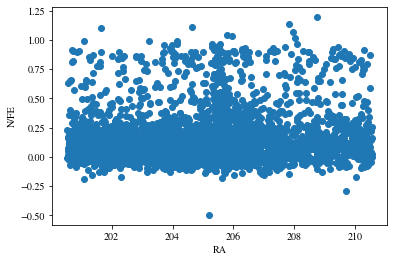

In [52]:
plt.scatter(data_snrfilter[M3.columns.get_loc("ra")], data_snrfilter[M3.columns.get_loc("NFE")])
plt.xlabel('RA'), plt.ylabel('N/FE')

FEH mean abundance: -0.4871550578345268
CFE mean abundance: 0.015488004095733811
CIFE mean abundance: -0.05208233335069116
NFE mean abundance: 0.17535234372426833
OFE mean abundance: 0.1171588853912058
MGFE mean abundance: 0.10901940288601836
ALFE mean abundance: 0.05650091164475794
SIFE mean abundance: 0.07101632365310087
PFE mean abundance: 0.23372374685152553
SFE mean abundance: 0.037611174814049186
KFE mean abundance: 0.0869068294299421
CAFE mean abundance: 0.09865593645453051
TIFE mean abundance: -0.037410882625295766
TIIIFE mean abundance: 0.004994864872230138
VFE mean abundance: -0.08543622528436208
CRFE mean abundance: 0.014401353075709836
MNFE mean abundance: -0.06743956197908779
COFE mean abundance: -0.16998276197438014
NIFE mean abundance: 0.042885845873536735


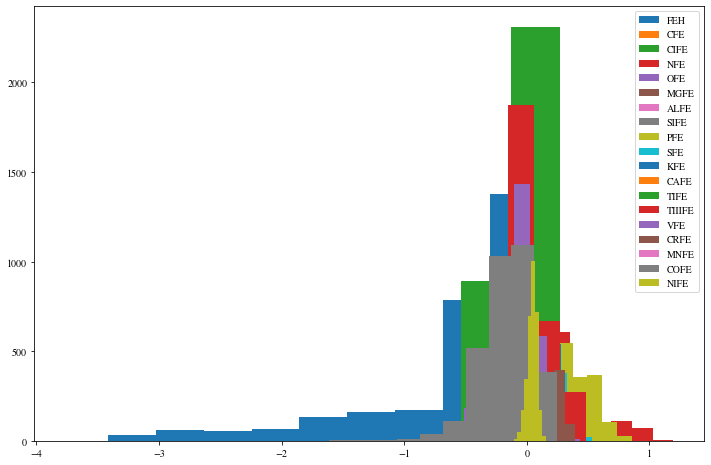

In [53]:
abundance_params = [column for column in M3.columns if 'FE' in column and not '_err' in column]
plt.figure(figsize = (12, 8))
for param in abundance_params:
    plt.hist(data_snrfilter[M3.columns.get_loc(param)], label = param)  # plot
    print(param + f" mean abundance: {np.mean(data_snrfilter[M3.columns.get_loc(param)])}")
plt.legend()

(array([1.000e+00, 5.000e+00, 6.670e+02, 1.451e+03, 6.060e+02, 1.940e+02,
        9.400e+01, 1.120e+02, 7.500e+01, 7.000e+00]),
 array([-0.49465266, -0.32568012, -0.15670759,  0.01226495,  0.18123748,
         0.35021002,  0.51918256,  0.68815509,  0.85712763,  1.02610016,
         1.1950727 ]),
 <BarContainer object of 10 artists>)

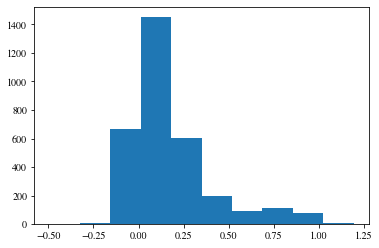

In [54]:
plt.hist(data_snrfilter[M3.columns.get_loc("NFE")])

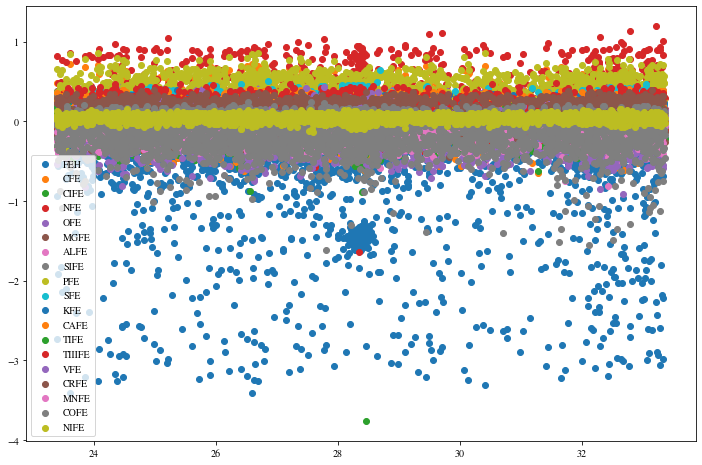

In [55]:
plt.figure(figsize = (12, 8))
for param in abundance_params:
    plt.scatter(data_snrfilter[M3.columns.get_loc("dec")], data_snrfilter[M3.columns.get_loc(param)], label = param)
plt.legend()

(Text(0.5, 0, 'Dec'), Text(0, 0.5, 'N/FE'))

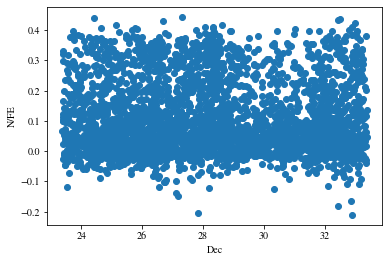

In [56]:
plt.scatter(data_snrfilter[M3.columns.get_loc("dec")], data_snrfilter[M3.columns.get_loc("OFE")])
plt.xlabel('Dec'), plt.ylabel('N/FE')

-18.727364640722605

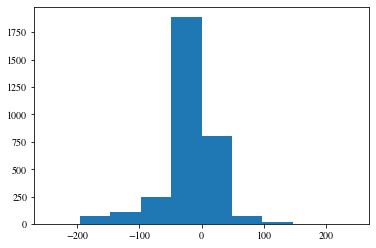

In [57]:
plt.hist(data_snrfilter[M3.columns.get_loc("RV")])
np.mean(data_snrfilter[M3.columns.get_loc("RV")])

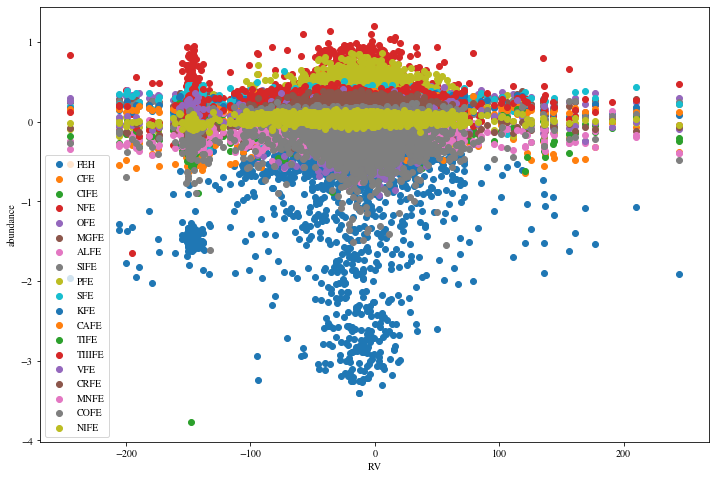

In [58]:
plt.figure(figsize = (12, 8))
for param in abundance_params:
    plt.scatter(data_snrfilter[M3.columns.get_loc("RV")], data_snrfilter[M3.columns.get_loc(param)], label = param)
plt.xlabel('RV'), plt.ylabel('abundance')
plt.legend()

#### STEP 3: Define parameters for your GC of interest. 

These parameters are taken from the Baumgardt & Hilker (2018) catalogue: https://people.smp.uq.edu.au/HolgerBaumgardt/globular/.

In [59]:
ra_M3 = 205.548  # [deg]
dec_M3 = 28.3772  # [deg]
dist_M3 = 10180  # [pc]
rt_M3 = 159.0339  # [pc] -- tidal radius @ apogalacticon
rhm_M3 = 6.34  # [pc]
rhm_M3_deg = math.degrees(math.atan(rhm_M3 / dist_M3))  # deg
pmra_M3 = -0.152  # [mas/yr]
pmdec_M3 = -2.670  # [mas/yr]

#### STEP 4: Define a control group of cluster members.

We must define a control group of likely cluster members of M3 so we can see where these stars end up in the t-SNE projection. 

In [60]:
# Select all the stars within some radius of the cluster:
def in_circle(center_x, center_y, radius, x, y):
    square_dist = (center_x - x) ** 2 + (center_y - y) ** 2
    return square_dist <= (radius) ** 2

ra_filtered = data_snrfilter[0]
dec_filtered = data_snrfilter[1]

# Select stars within 8 * r,hm (useful for large enough sample of probable cluster members):
in_halfmass = in_circle(ra_M3, dec_M3, 4*rhm_M3_deg, ra_filtered, dec_filtered)
indices_control = np.where(in_halfmass==True)

controlgroup = []
for i in data_snrfilter:
    b = np.array(i)[indices_control]
    controlgroup.append(b)

# Example control group parameters: 
ra_control = controlgroup[0]
dec_control = controlgroup[1]

print("There are {} stars in our M3 control group.".format(len(ra_control)))

There are 72 stars in our M3 control group.


FEH mean abundance: -1.4237357393055554
CFE mean abundance: -0.34161354868055555
CIFE mean abundance: -0.18531779751388885
NFE mean abundance: 0.4603883753333333
OFE mean abundance: 0.3001264343879167
MGFE mean abundance: 0.23280856666666663
ALFE mean abundance: 0.0029396772722222212
SIFE mean abundance: 0.21383160907708335
PFE mean abundance: -0.03499555475972222
SFE mean abundance: 0.3083535995833333
KFE mean abundance: 0.1624365333611111
CAFE mean abundance: 0.1376841507638889
TIFE mean abundance: -0.10376751628152778
TIIIFE mean abundance: 0.1328754880138889
VFE mean abundance: 0.01824529105
CRFE mean abundance: -0.12644661359722223
MNFE mean abundance: -0.26741158837500006
COFE mean abundance: -0.24036800518472223
NIFE mean abundance: -0.026932671749583335


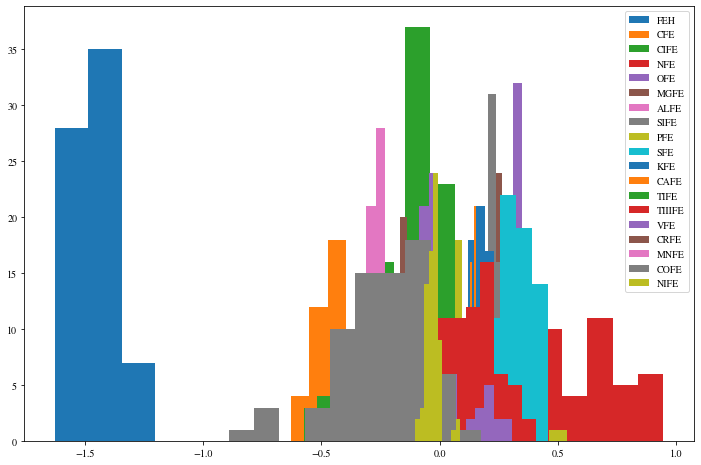

In [61]:
abundance_params = [column for column in M3.columns if 'FE' in column and not '_err' in column]
plt.figure(figsize = (12, 8))
for param in abundance_params:
    plt.hist(controlgroup[M3.columns.get_loc(param)], label = param)  # plot
    print(param + f" mean abundance: {np.mean(controlgroup[M3.columns.get_loc(param)])}")
plt.legend()

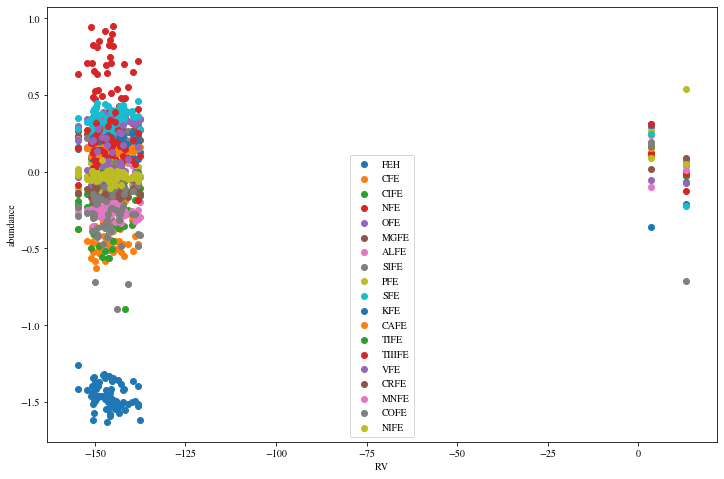

In [62]:
plt.figure(figsize = (12, 8))
for param in abundance_params:
    plt.scatter(controlgroup[M3.columns.get_loc("RV")], controlgroup[M3.columns.get_loc(param)], label = param)
plt.xlabel('RV'), plt.ylabel('abundance')
plt.legend()

#### ***CHECK-IN: Add this control group to your above exploratory plots.* 

What do you notice about these stars? What changes if you adjust the control group radius (i.e. what if you go larger or smaller than 8*r,hm)?


#### STEP 5: Run t-SNE on the control group and full filtered sample of APOGEE DR17 stars.

First, we standardize the data to ensure that no elements dominate or skew the t-SNE run. We want to include 19 chemical abundances and radial velocities in our run.  

In [63]:
FE_H_filtered, C_FE_filtered, CI_FE_filtered = data_snrfilter[24], data_snrfilter[26], data_snrfilter[28]
N_FE_filtered, O_FE_filtered, MG_FE_filtered = data_snrfilter[30], data_snrfilter[32], data_snrfilter[34]
AL_FE_filtered, SI_FE_filtered, P_FE_filtered = data_snrfilter[36], data_snrfilter[38], data_snrfilter[40]
S_FE_filtered, K_FE_filtered, CA_FE_filtered = data_snrfilter[42], data_snrfilter[44], data_snrfilter[46]
TI_FE_filtered, TIII_FE_filtered, V_FE_filtered = data_snrfilter[48], data_snrfilter[50], data_snrfilter[52]
CR_FE_filtered, MN_FE_filtered, CO_FE_filtered, NI_FE_filtered = data_snrfilter[54], data_snrfilter[56], data_snrfilter[58], data_snrfilter[60]
RV_filtered  = data_snrfilter[9]

pretsne_array = np.array([FE_H_filtered, C_FE_filtered, CI_FE_filtered, N_FE_filtered, O_FE_filtered, MG_FE_filtered,
                      AL_FE_filtered, SI_FE_filtered, P_FE_filtered, S_FE_filtered, K_FE_filtered, CA_FE_filtered, 
                      TI_FE_filtered, TIII_FE_filtered, V_FE_filtered, CR_FE_filtered, MN_FE_filtered, CO_FE_filtered,
                       NI_FE_filtered, RV_filtered])

standardized_array = []
standardization_means = np.zeros(len(pretsne_array))
standardization_sigmas = np.zeros(len(pretsne_array))
for i, param in enumerate(pretsne_array):
    mean, sigma = np.mean(param), np.std(param)
    norm = (param - mean) / sigma
    standardized_array.append(norm)
    standardization_means[i] = mean
    standardization_sigmas[i] = sigma

Next, we apply the t-SNE algorithm via scikit-learn to reduce the dimensionality of the data from 20-D to 2-D.

In [64]:
# Transpose the standardized + filtered array:
standardized_array_transpose = np.transpose(standardized_array)

# Run t-SNE on the transposed array:
tsne_init = TSNE(n_components=2, perplexity=30, early_exaggeration=12, learning_rate=200, init='random')
tsne_2d = tsne_init.fit_transform(standardized_array_transpose)

# Get t-SNE outputs for complete filtered dataset:
t_SNE_dimX = tsne_2d[:, 0]
t_SNE_dimY = tsne_2d[:, 1]

# Get t-SNE outputs for control group:
tsne_dimX_control = t_SNE_dimX[indices_control]
tsne_dimY_control = t_SNE_dimY[indices_control]

Finally, we plot the 2-D t-SNE projection. 

<ipython-input-65-963ec6cd2b7b>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('tsne_original_data.png', fmt='png')


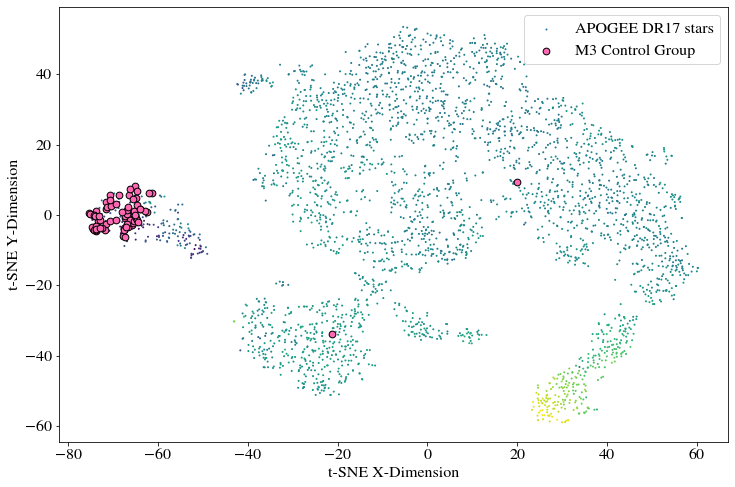

In [65]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(t_SNE_dimX, t_SNE_dimY, s=1, c=C_FE_filtered, label='APOGEE DR17 stars')
ax.scatter(tsne_dimX_control , tsne_dimY_control, s=45, edgecolor='k', c='hotpink', label='M3 Control Group')
ax.set_xlabel("t-SNE X-Dimension", fontsize=16)
ax.set_ylabel("t-SNE Y-Dimension", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.legend(fontsize=16)
plt.savefig('tsne_original_data.png', fmt='png')
plt.show()

## UMAP stuff:

In [66]:
import umap.umap_ as umap

# Try using SKLEARN's StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler

In [67]:
reducer = umap.UMAP(n_neighbors=15)
embedding = reducer.fit_transform(standardized_array_transpose)

# Get t-SNE outputs for complete filtered dataset:
umap_dimX = embedding[:, 0]
umap_dimY = embedding[:, 1]

# Get t-SNE outputs for control group:
umap_dimX_control = umap_dimX[indices_control]
umap_dimY_control = umap_dimY[indices_control]

<ipython-input-68-6d241bdb3d2d>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('umap_original_data.png', fmt='png')


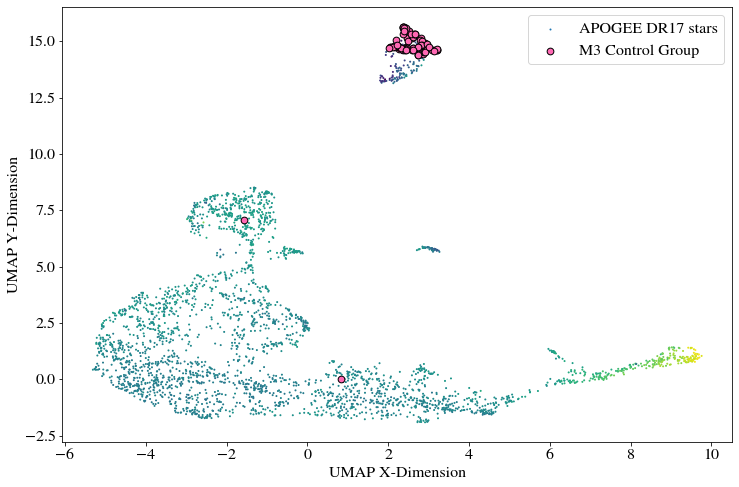

In [68]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(umap_dimX, umap_dimY, s=1, c=C_FE_filtered, label='APOGEE DR17 stars')
ax.scatter(umap_dimX_control , umap_dimY_control, s=45, edgecolor='k', c='hotpink', label='M3 Control Group')
ax.set_xlabel("UMAP X-Dimension", fontsize=16)
ax.set_ylabel("UMAP Y-Dimension", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
# fig.colorbar(fig, cax=ax)
ax.legend(fontsize=16)
plt.savefig('umap_original_data.png', fmt='png')

In [69]:
np.sum(umap_dimY_control > 10)/len(umap_dimY_control)

0.9722222222222222

#### ***CHECK-IN: You succesfully ran t-SNE!*

What does this specific t-SNE projection actually tell you? How could you improve this t-SNE run? Importantly, how could you extend this method to find extra-tidal candidates of M3?


#### Improving the Dimensionality Reduction
Fine tune the hyper-parameters:
- understand how the different hyper-parameters affect the data
- what combination of hyper-parameters achieve the best separation of the control group? to acheive the best 

Helpful Papers:

https://distill.pub/2016/misread-tsne/ 

https://towardsdatascience.com/how-to-tune-hyperparameters-of-tsne-7c0596a18868 

Dimensional Reduction Astronomy Example:
https://arxiv.org/pdf/2210.02471.pdf


## Monte Carlo

For every point in the data set we draw new points from a normal distribution centered on that point with the standard deviation given by the error

In [70]:
np.random.seed(1234)  # set seed to test this

nsims = 1  # number of simulations to use for monte carlo, just use 1 for now
for j in range(0, nsims):
    # create copy of snrfilter
    monte_carlo_data = data_snrfilter.copy()
    # use all abundance parameters and rv since that's what our umap is based on:
    for param in abundance_params + ['RV']:
        # list of random points drawn using monte carlo for a given chemical abundance
        monte_carlo_points_param = np.array([np.random.normal(loc=data_snrfilter[M3.columns.get_loc(param)][i], scale=data_snrfilter[M3.columns.get_loc(param + '_err')][i], size=1) for i in range(0, len(data_snrfilter[M3.columns.get_loc(param)]))]).reshape(-1)
        # replace data in monte_carlo_data with the random points drawn using monte carlo
        monte_carlo_data[M3.columns.get_loc(param)] = monte_carlo_points_param
    

Create the pre-UMAP/t-SNE array:

In [71]:
FE_H_filtered, C_FE_filtered, CI_FE_filtered = monte_carlo_data[24], monte_carlo_data[26], monte_carlo_data[28]
N_FE_filtered, O_FE_filtered, MG_FE_filtered = monte_carlo_data[30], monte_carlo_data[32], monte_carlo_data[34]
AL_FE_filtered, SI_FE_filtered, P_FE_filtered = monte_carlo_data[36], monte_carlo_data[38], monte_carlo_data[40]
S_FE_filtered, K_FE_filtered, CA_FE_filtered = monte_carlo_data[42], monte_carlo_data[44], monte_carlo_data[46]
TI_FE_filtered, TIII_FE_filtered, V_FE_filtered = monte_carlo_data[48], monte_carlo_data[50], monte_carlo_data[52]
CR_FE_filtered, MN_FE_filtered, CO_FE_filtered, NI_FE_filtered = monte_carlo_data[54], monte_carlo_data[56], monte_carlo_data[58], monte_carlo_data[60]
RV_filtered  = monte_carlo_data[9]

# create array of all the abundances and also RV

preumaptsne_array = np.array([FE_H_filtered, C_FE_filtered, CI_FE_filtered, N_FE_filtered, O_FE_filtered, MG_FE_filtered,
                      AL_FE_filtered, SI_FE_filtered, P_FE_filtered, S_FE_filtered, K_FE_filtered, CA_FE_filtered, 
                      TI_FE_filtered, TIII_FE_filtered, V_FE_filtered, CR_FE_filtered, MN_FE_filtered, CO_FE_filtered,
                       NI_FE_filtered, RV_filtered])

# create standardized umap array

# standardized_umap_array = StandardScaler().fit_transform(preumaptsne_array)

# create standardized tsne array

# standardized_array = []
# standardization_means = np.zeros(len(pretsne_array))
# standardization_sigmas = np.zeros(len(pretsne_array))
# for i, param in enumerate(pretsne_array):
#     mean, sigma = np.mean(param), np.std(param)
#     norm = (param - mean) / sigma
#     standardized_array.append(norm)
#     standardization_means[i], standardization_sigmas[i] = mean, sigma
    

standardized_tsne_array = []
for i, param in enumerate(preumaptsne_array):
    # mean, sigma = np.mean(i), np.std(i)
    norm = (param - standardization_means[i]) / standardization_sigmas[i]
    standardized_tsne_array.append(norm)

Now run UMAP:

In [72]:
# Transpose the standardized + filtered array:
standardized_umap_array_transpose = np.transpose(standardized_tsne_array)

# Run UMAP on the transposed array, using the same reducer as earlier:
embedding = reducer.transform(standardized_umap_array_transpose)

# Get UMAP outputs for complete filtered dataset:
umap_dimX = embedding[:, 0]
umap_dimY = embedding[:, 1]

# Get UMAP outputs for control group:
umap_dimX_control = umap_dimX[indices_control]
umap_dimY_control = umap_dimY[indices_control]

Now run t-SNE:

In [73]:
# Transpose the standardized + filtered array:
standardized_tsne_array_transpose = np.transpose(standardized_tsne_array)

# Run t-SNE on the transposed array:
# tsne_init = TSNE(n_components=2, perplexity=30, early_exaggeration=12, learning_rate=200, init='random')
tsne_2d = tsne_init.fit_transform(standardized_tsne_array_transpose)

# Get t-SNE outputs for complete filtered dataset:
t_SNE_dimX = tsne_2d[:, 0]
t_SNE_dimY = tsne_2d[:, 1]

# Get t-SNE outputs for control group:
tsne_dimX_control = t_SNE_dimX[indices_control]
tsne_dimY_control = t_SNE_dimY[indices_control]

Plotting both:

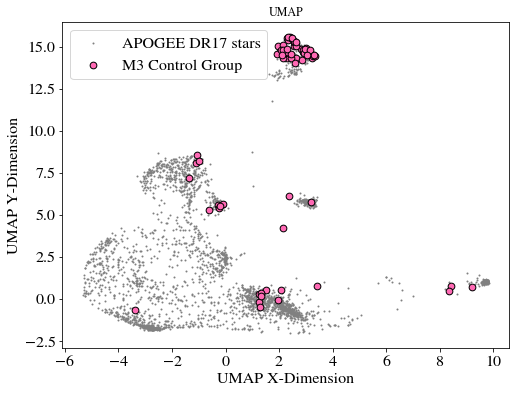

In [74]:
# plotting UMAP:

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(umap_dimX, umap_dimY, s=1, c='gray', label='APOGEE DR17 stars')
ax.scatter(umap_dimX_control , umap_dimY_control, s=45, edgecolor='k', c='hotpink', label='M3 Control Group')
ax.set_xlabel("UMAP X-Dimension", fontsize=16)
ax.set_ylabel("UMAP Y-Dimension", fontsize=16)
ax.set_title('UMAP')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.legend(fontsize=16)

plt.show()

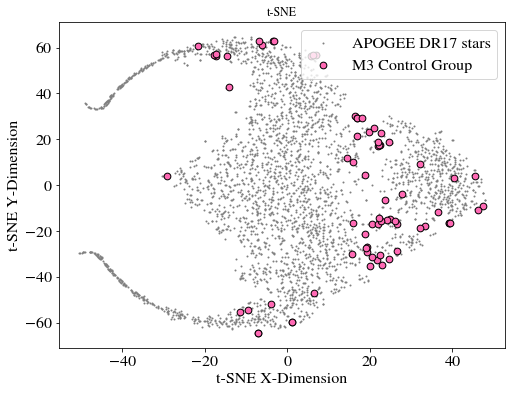

In [75]:
# plotting t-SNE:

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(t_SNE_dimX, t_SNE_dimY, s=1, c='gray', label='APOGEE DR17 stars')
ax.scatter(tsne_dimX_control , tsne_dimY_control, s=45, edgecolor='k', c='hotpink', label='M3 Control Group')
ax.set_xlabel("t-SNE X-Dimension", fontsize=16)
ax.set_ylabel("t-SNE Y-Dimension", fontsize=16)
ax.set_title('t-SNE')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.legend(fontsize=16, loc=1)
plt.show()

Helper function:

In [76]:
n=2
np.zeros((np.array(data_snrfilter).shape + (n,))).shape

(62, 3212, 2)

In [77]:
# test = np.array([1, 2, 3])
# if test:
#     print(1)

In [78]:
def generate_monte_carlo_realizations(df, colnames=M3.columns, n=1, seed=None):
    """
    Generates n Monte Carlo realizations from a dataframe df that's like data_snrfilter (list of arrays)
    Optionally takes a seed for the Monte Carlo realization and also the column names of the data 
    
    Returns an n x df.shape array of n different monte carlo realizations of the chemical abundances and RVs in df 
    """
    # abundance params to do the monte carlo realizations for
    abundance_params = [column for column in colnames if 'FE' in column and not '_err' in column]
    
    np.random.seed(seed)  # set seed
    nsims = n  # number of simulations to use for monte carlo
    monte_carlo_realizations = []  # monte carlo realizations should be the shape of the data frame times the number of simulations
    
    # do the monte carlo
    for j in range(0, nsims):
        # create copy of data
        monte_carlo_data = df.copy()
        # do a single monte carlo realization for all abundance parameters and rv since that's what umap is based on:
        for param in abundance_params + ['RV']:
            # list of random points drawn using monte carlo for a given chemical abundance
            # reshape(-1) flattens the array since it's a vector
            monte_carlo_points_param = np.array([np.random.normal(loc=df[colnames.get_loc(param)][i], scale=df[colnames.get_loc(param + '_err')][i], size=1) for i in range(0, len(df[colnames.get_loc(param)]))]).reshape(-1)
            # replace data in monte_carlo_data with the random points drawn using monte carlo
            monte_carlo_data[colnames.get_loc(param)] = monte_carlo_points_param
        # now add that to the monte_carlo_realizations array
        monte_carlo_realizations.append(monte_carlo_data)
    
    # return all the realizations
    return monte_carlo_realizations


def create_standardized_array(df, means_sigmas=None, return_transformation=False):
    """
    Create a standardized array for use in t-SNE/UMAP from a dataframe df that's like data_snrfilter (list of arrays)
    
    means_sigmas: tuple of means and sigmas provided to use in the transformation, should be the same length as unstandardized_array
    
    return:
    
    standardized array
    means (if return_transformation)
    sigmas (if return_transformation)
    """
    
    # get all the chemical abundances
    FE_H, C_FE, CI_FE = df[24], df[26], df[28]
    N_FE, O_FE, MG_FE = df[30], df[32], df[34]
    AL_FE, SI_FE, P_FE = df[36], df[38], df[40]
    S_FE, K_FE, CA_FE = df[42], df[44], df[46]
    TI_FE, TIII_FE, V_FE = df[48], df[50], df[52]
    CR_FE, MN_FE, CO_FE, NI_FE = df[54], df[56], df[58], df[60]
    RV = df[9]
    
    # create unstandardized array of all the abundances and also RV

    unstandardized_array = np.array([FE_H, C_FE, CI_FE, N_FE, O_FE, MG_FE,
                      AL_FE, SI_FE, P_FE, S_FE, K_FE, CA_FE, 
                      TI_FE, TIII_FE, V_FE, CR_FE, MN_FE, CO_FE,
                       NI_FE, RV])
    
    # standardize the array for use in t-SNE/UMAP
    standardized_array = []  # standardized array
    
    # if means and sigmas are none, then compute means and sigmas normally 
    if means_sigmas is None:
        means, sigmas = np.zeros(len(unstandardized_array)), np.zeros(len(unstandardized_array))  # save the means and sigmas used for the transformation
        for i, param in enumerate(unstandardized_array):
            # param is abundance/rv
            mean, sigma = np.mean(param), np.std(param)
            means[i], sigmas[i] = mean, sigma  # add mean and sigma to the array
            norm = (param - mean) / sigma
            standardized_array.append(norm)
    
    # if means and sigmas are an array, then we use that instead
    else:
        # unpack means and sigmas
        means, sigmas = means_sigmas
        for i, param in enumerate(unstandardized_array):
            norm = (param - means[i]) / sigmas[i]
            standardized_array.append(norm)
            
    # if return transformation true return the means and sigmas too
    if return_transformation:
        return standardized_array, means, sigmas
    else:
        return standardized_array
    

Do UMAP again:

In [79]:
# performing umap, saving the means and sigmas for the standardization
standardized_array, means, sigmas = create_standardized_array(data_snrfilter, return_transformation=True)
# transpose array
standardized_array_transpose = np.transpose(standardized_array)
# Run UMAP on the transposed array, saving the reducer after running it on the standardized data
reducer = umap.UMAP(n_neighbors=15)
embedding = reducer.fit_transform(standardized_array_transpose)

Creating the 6-panel Monte Carlo realization to compare UMAP first, generating and then plotting the data:

In [80]:
# generate monte carlo realizations from the data and standardize it
n_realizations = 6
monte_carlo_data = generate_monte_carlo_realizations(data_snrfilter, n=n_realizations)

# standardize all the arrays:
standardized_monte_carlo_data = [create_standardized_array(monte_carlo_data[i], means_sigmas=[means, sigmas]) for i in range(0, n_realizations)]

Do UMAP on the data and then plot:

1it [00:12, 12.69s/it]

0.6527777777777778


2it [00:26, 13.35s/it]

0.6944444444444444


3it [00:38, 12.96s/it]

0.7361111111111112


4it [00:51, 12.60s/it]

0.625


5it [01:03, 12.46s/it]

0.7222222222222222


6it [01:16, 12.76s/it]

0.625



<ipython-input-81-354b15229f3d>:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('umap_monte_carlo_realizations.png', fmt='png')


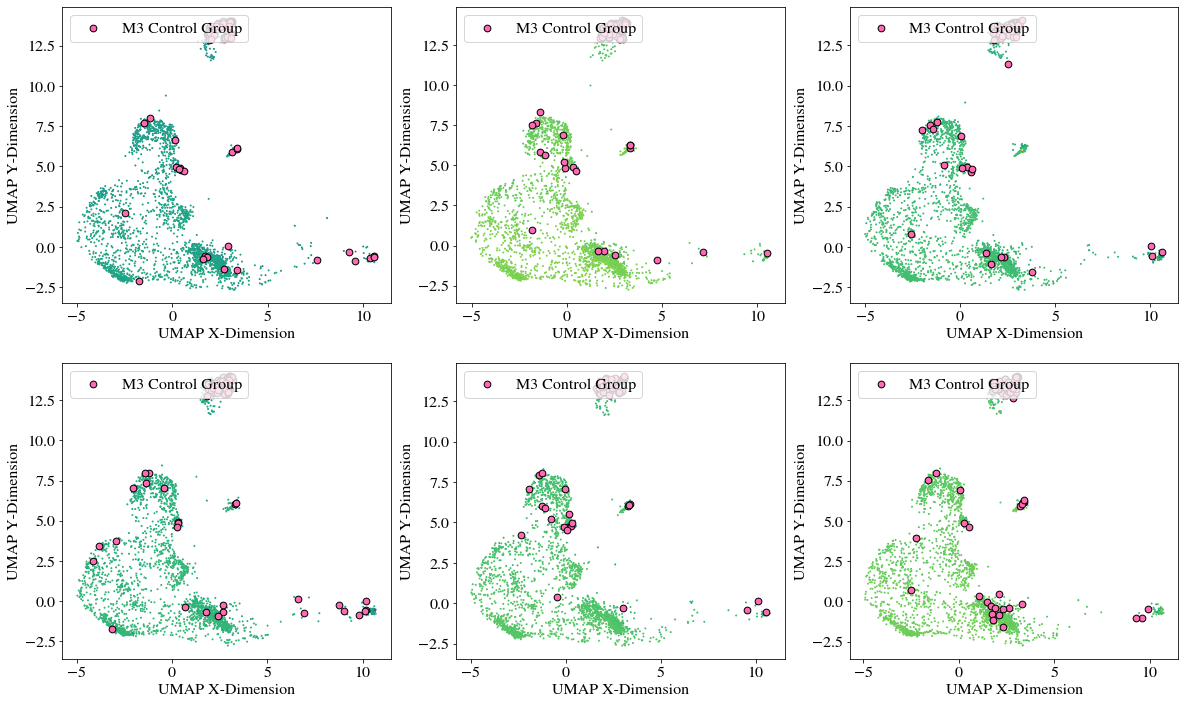

In [81]:
from tqdm import tqdm

fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (20, 12))
# do umap on each set of data and plot it:
for i, standardized_array in tqdm(enumerate(standardized_monte_carlo_data)):

    # Transpose the standardized + filtered array:
    standardized_array_transpose = np.transpose(standardized_array)

    # Run UMAP on the transposed array:
    embedding = reducer.transform(standardized_array_transpose)

    # Get UMAP outputs for complete filtered dataset:
    umap_dimX = embedding[:, 0]
    umap_dimY = embedding[:, 1]

    # Get UMAP outputs for control group:
    umap_dimX_control = umap_dimX[indices_control]
    umap_dimY_control = umap_dimY[indices_control]
    
    # Get FE/H data to use for the colorbar
    FE_H = standardized_array[0]  # 2nd entry in the array (see from the create_standardized_array() function)
    
    # plot the data!
    ax[i % 2, i % 3].scatter(umap_dimX, umap_dimY, s=1, c=FE_H)#, label='APOGEE DR17 stars')
    ax[i % 2, i % 3].scatter(umap_dimX_control , umap_dimY_control, s=45, edgecolor='k', c='hotpink', label='M3 Control Group')
    ax[i % 2, i % 3].set_xlabel("UMAP X-Dimension", fontsize=16)
    ax[i % 2, i % 3].set_ylabel("UMAP Y-Dimension", fontsize=16)
    # ax[i % 2, i % 3].set_title('UMAP')
    ax[i % 2, i % 3].tick_params(axis='both', which='major', labelsize=16)
    ax[i % 2, i % 3].tick_params(axis='both', which='minor', labelsize=16)
    ax[i % 2, i % 3].legend(fontsize=16, loc='upper left')
    print(sum(umap_dimY_control > 10)/len(umap_dimY_control))

plt.savefig('umap_monte_carlo_realizations.png', fmt='png')
plt.show()

### Larger Monte Carlo:

First do UMAP on the data again and then save the standardization transformation and the reducer to use on the Monte Carlo realizations:

In [82]:
# performing umap, saving the means and sigmas for the standardization
standardized_array, means, sigmas = create_standardized_array(data_snrfilter, return_transformation=True)
# transpose array
standardized_array_transpose = np.transpose(standardized_array)
# Run UMAP on the transposed array, saving the reducer after running it on the standardized data
reducer = umap.UMAP(n_neighbors=15)
embedding = reducer.fit_transform(standardized_array_transpose)

Next generate $m$ Monte Carlo realizations, and standardize using `means` and `sigmas`

In [83]:
m = 100  # m monte carlo realizations

# generate realizations from data_snrfilter and standardize them using mean and sigma computed earlier
realizations = generate_monte_carlo_realizations(data_snrfilter, n=m)
# standardize:
standardized_realizations = np.array([create_standardized_array(realizations[i], means_sigmas=[means, sigmas]) for i in range(0, m)])

Then we perform UMAP on every array in the data to obtain $2$ $m \times n$ arrays, one for the $x$ values and one for the $y$ values returned by UMAP. Use the same reducer from earlier:

In [84]:
umap_xs, umap_ys = np.zeros((2, m, len(data_snrfilter[0])))  # create empty array of xs and ys for umap
# this has dimensions of n x 3212

for i, standardized_realization in tqdm(enumerate(standardized_realizations)):
    # Transpose the standardized + filtered array:
    standardized_realization_transpose = np.transpose(standardized_realization)
    
    # Run UMAP on the transposed array, using the same reducer as earlier
    mc_embedding = reducer.transform(standardized_realization_transpose)

    # Then get UMAP output for the specific monte carlo realization:
    umap_xs[i] = mc_embedding[:, 0]
    umap_ys[i] = mc_embedding[:, 1]

100it [20:27, 12.27s/it]


Plot every point on the same graph:

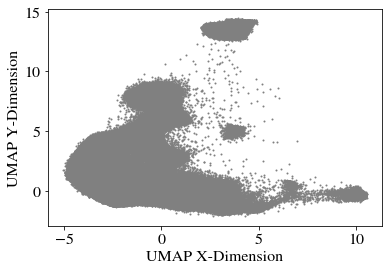

In [85]:
plt.scatter(umap_xs.flatten(), umap_ys.flatten(), s=1, c='gray')#, label='APOGEE DR17 stars')
# plt.scatter(umap_dimX_control , umap_dimY_control, s=45, edgecolor='k', c='hotpink', label='M3 Control Group')
plt.xlabel("UMAP X-Dimension", fontsize=16)
plt.ylabel("UMAP Y-Dimension", fontsize=16)
# plt.set_title('UMAP')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)

Now we can compute the $x$, $y$ covariance matrix of every point:

In [86]:
covs = np.array([np.cov(umap_xs[:, i], umap_ys[:, i]) for i in range(0, len(umap_xs.T))])

In [87]:
min_xvar_location = np.argmin(covs[:,0][:,0])
min_xvar_location, covs[min_xvar_location]

(1748,
 array([[ 0.00344919, -0.00510358],
        [-0.00510358,  0.04100121]]))

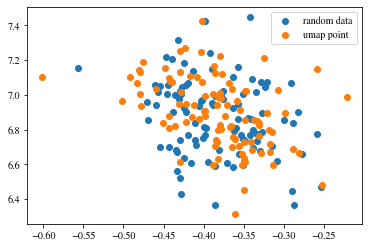

In [88]:
mean_x = np.mean(umap_xs[:, min_xvar_location])
mean_y = np.mean(umap_ys[:, min_xvar_location])
cov = np.cov(umap_xs[:, min_xvar_location], umap_ys[:, min_xvar_location])

xs, ys = np.random.multivariate_normal([mean_x, mean_y], cov, size = 100).T

plt.scatter(xs, ys, label = 'random data')
plt.scatter(umap_xs[:, min_xvar_location], umap_ys[:, min_xvar_location], label = 'umap point')
plt.legend()

And plot the "cloud" of points, colouring things in:

In [89]:
np.array(data_snrfilter)[:,min_xvar_location]

array([210.181873, 28.81835, '2M14004364+2849060', 1452803341054343808,
       0.67204607, -16.747688, 0.018924, -2.1274347, 0.0161199, 27.485039,
       0.022851031, 1412.44152832031, 85.6335888634612, 96.9890010852112,
       5.05336391097519, 1311.79749183107, 13.8638864417175,
       79.6187412934397, 1.71485569779067, 4626.626, 21.130215, 2.3007076,
       0.051571093, 492.32385, -0.21432574, 0.01781197, 0.14813416,
       0.028347144, 0.12738058, 0.037691485, 0.19068831, 0.02357479,
       0.23103526, 0.028320326, 0.26848912, 0.032398947, 0.23448855,
       0.03513407, 0.17051572, 0.027478877, 0.23758848, 0.31953526,
       0.22819123, 0.027895724, 0.23464327, 0.036900654, 0.08537538,
       0.042972416, 0.149959, 0.034067273, 0.3087046, 0.042139515,
       -0.14480586, 0.09035247, -0.020473063, 0.032395814, -0.07095592,
       0.03093297, 0.15567423, 0.025649814, 0.055908322, 0.024823675],
      dtype=object)

<ipython-input-99-6c9870565e7b>:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('cloud.png', fmt='png')


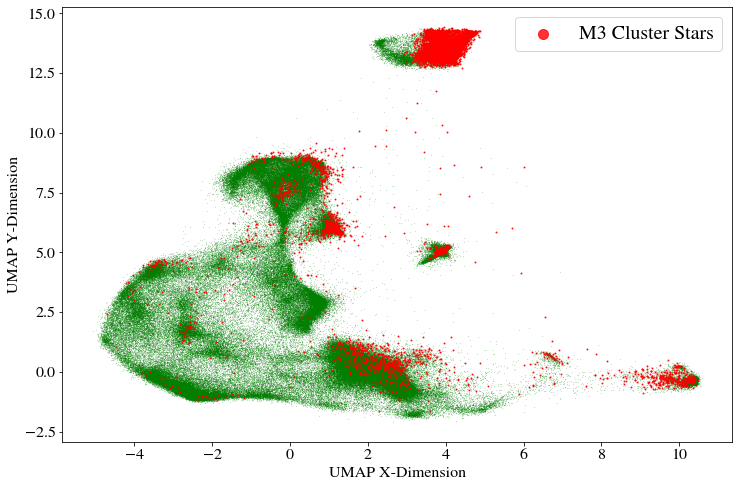

In [99]:
# plot
plt.figure(figsize = (12, 8))
# points
plt.scatter(umap_xs, umap_ys, s=0.01, c='green', alpha=0.8)
# color the M3 points red
plt.scatter(umap_xs[:, indices_control], umap_ys[:, indices_control], s=1, c='red', alpha=0.8, label = 'M3 Cluster Stars')

# fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=1), cmap=cmap))
plt.xlabel("UMAP X-Dimension", fontsize=16)
plt.ylabel("UMAP Y-Dimension", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
leg = plt.legend(fontsize=20)
leg.legendHandles[0]._sizes = [100]
plt.savefig('cloud.png', fmt='png')

<ipython-input-45-aedafece21a7>:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('dec_07_cloud_single_point.png', fmt='png')


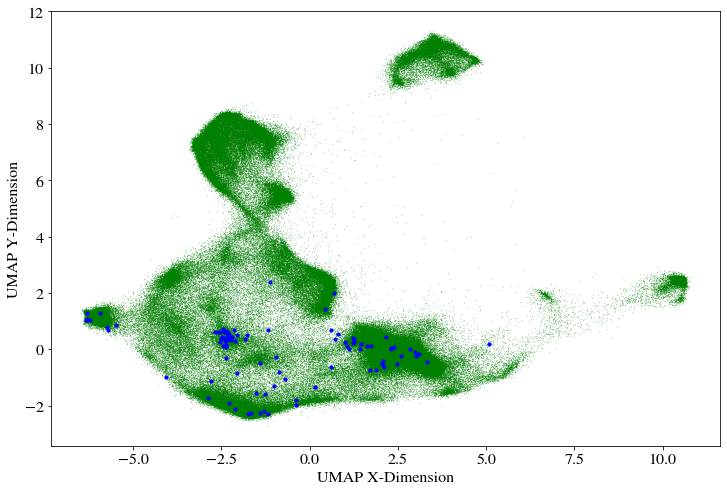

In [45]:
# index of point to highlight
index = 0


# plot
plt.figure(figsize = (12, 8))
# points
plt.scatter(umap_xs, umap_ys, s=0.01, c='green')
# color the ones of interest red
plt.scatter(umap_xs[:, index], umap_ys[:, index], s=10, c='blue')
# color the M3 points pink
# plt.scatter(umap_xs[:, indices_control], umap_ys[:, indices_control], s=10, c='red', label = 'M3 Control Group')

# fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=1), cmap=cmap))
plt.xlabel("UMAP X-Dimension", fontsize=16)
plt.ylabel("UMAP Y-Dimension", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
# plt.legend()

plt.savefig('dec_07_cloud_single_point.png', fmt='png')

<ipython-input-46-3f9d4e1f8061>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('cloud_single_point_M3.png', fmt='png')


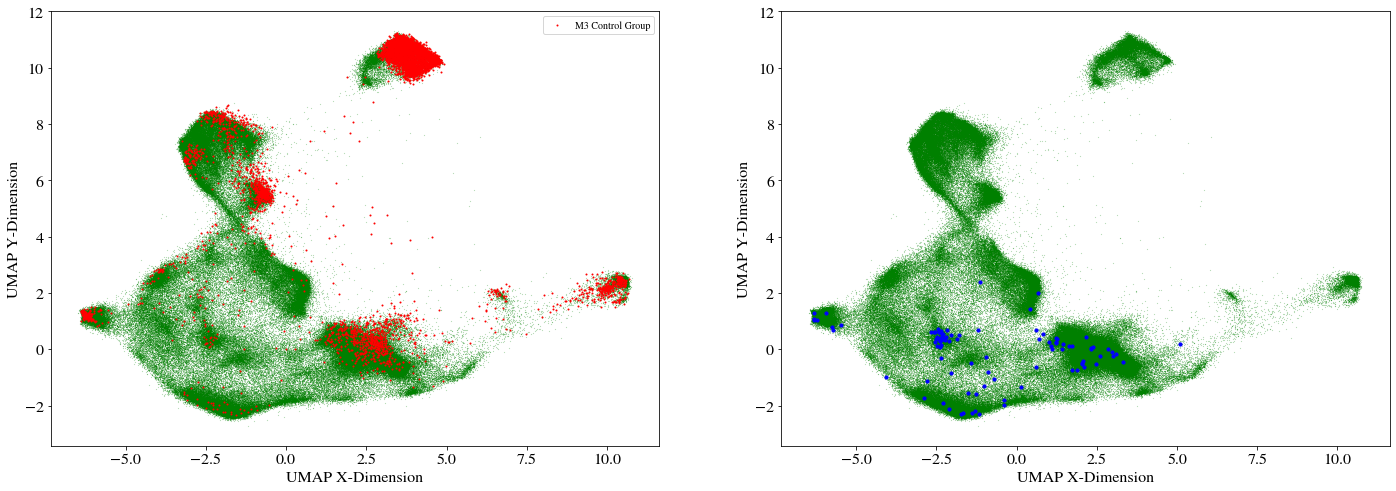

In [46]:
# index of point to highlight
index = 0


# plot
fig, ax = plt.subplots(1, 2, figsize = (24, 8))
# points
ax[0].scatter(umap_xs, umap_ys, s=0.01, c='green')
ax[1].scatter(umap_xs, umap_ys, s=0.01, c='green')
# color the ones of interest red
ax[1].scatter(umap_xs[:, index], umap_ys[:, index], s=10, c='blue')
# color the M3 points pink
ax[0].scatter(umap_xs[:, indices_control], umap_ys[:, indices_control], s=1, c='red', label = 'M3 Control Group')

# fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=1), cmap=cmap))
ax[0].set_xlabel("UMAP X-Dimension", fontsize=16)
ax[0].set_ylabel("UMAP Y-Dimension", fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=16)
ax[0].legend()

ax[1].set_xlabel("UMAP X-Dimension", fontsize=16)
ax[1].set_ylabel("UMAP Y-Dimension", fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=16)

plt.savefig('cloud_single_point_M3.png', fmt='png')

In [47]:
sum(umap_ys[:, indices_control].reshape(-1) > 12.5)/len(umap_ys[:, indices_control].reshape(-1))

0.0

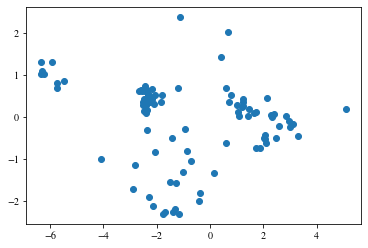

In [48]:
plt.scatter(umap_xs[:,index], umap_ys[:,index])

Now convert every UMAP point like a $2$D Gaussian to $1$D $\chi^2$ distribution, using $\chi^2 = \left(\vec{x} - \vec{u}\right)^T\,C^{-1}\,\left(\vec{x} - \vec{u}\right)$. $\vec{x}$ is a $2-D$ vector and $C^{-1}$ is a $2\times2$ matrix. Should have $2$ degrees of freedom. First test to make sure this works with mock Gaussian data:

In [49]:
len(umap_xs.T)

3212

In [50]:
np.random.seed(0)
# degrees of freedom
df = 2  # 2D Gaussian
# compute vector of xy points and also mu
mus = np.array([np.mean(np.array(list(zip(umap_xs[:,j], umap_ys[:,j]))), axis=0) for j in range(0, len(umap_xs.T))])  # vector of x and y means, also makes sure the shape looks right
# generate x test data
xy_tests = np.array([np.random.multivariate_normal(mean=mus[i].reshape(-1), cov=covs[i], size=100) for i in range(0, len(umap_xs.T))])


Convert all the $2$-D Gaussian test data points into a 1d chi squared distribution:

In [51]:
test_p_values = np.zeros(len(umap_xs.T))

for i, x_tests in tqdm(enumerate(xy_tests)):
    test_mu = np.mean(x_tests, axis=0)
    # convert the 2d gaussian into 1d chi square and reshape
    test_chi2s = np.array([(x_test - test_mu) @ np.linalg.inv(covs[i]) @ (x_test - test_mu).T for x_test in x_tests]).reshape(-1)
    # compare to chi2 using ks test
    test_p_values[i] = stats.ks_1samp(x=test_chi2s, cdf=stats.chi2.cdf, args=[df])[1]


# plt.hist(np.array([(x_test - np.mean(xy_tests[1])) @ np.linalg.inv(covs[1]) @ (x_test - np.mean(xy_tests[1])).T for x_test in xy_tests[1]]).reshape(-1))

3212it [00:11, 283.33it/s]


Plot histogram of test $\chi^2$s compared to drawing directly from a $\chi^2$ distribution;

<ipython-input-52-3fe3663ea545>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('transformed_gaussian_chi2.png', fmt='png')


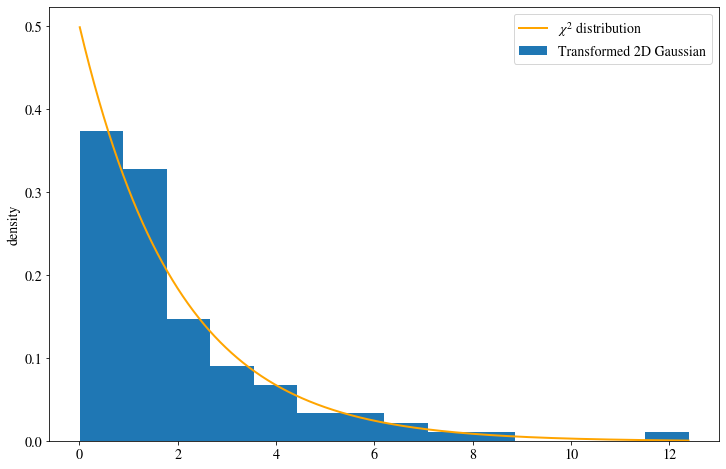

In [52]:
plt.rc('font', size = 14)
np.random.seed(0)
plt.figure(figsize = (12, 8))
plt.hist(test_chi2s, bins='fd', label = 'Transformed 2D Gaussian', density=True)
x = np.linspace(np.min(test_chi2s), np.max(test_chi2s), 10000)
plt.plot(x, stats.chi2.pdf(x, df=2), color='orange', lw=2, label = r'$\chi^2$ distribution')
plt.ylabel('density')
plt.legend()
plt.savefig('transformed_gaussian_chi2.png', fmt='png')

Now compare the test $\chi^2$ data to the known $\chi^2$ distribution with $2$ degrees of freedom using $K-S$ test and plot the resulting p-value histogram:

<ipython-input-53-6cc4b5d87b0f>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('test_p_values.png', fmt='png')


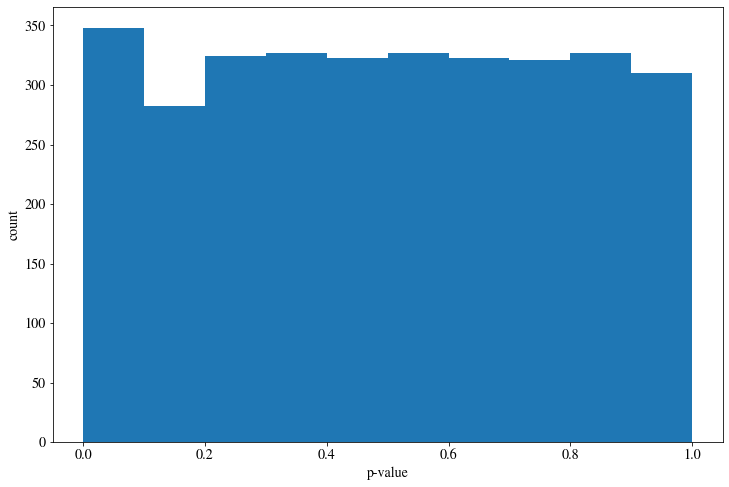

In [53]:
from scipy import stats
plt.figure(figsize = (12, 8))
plt.hist(test_p_values)
plt.ylabel('count'), plt.xlabel('p-value')
plt.savefig('test_p_values.png', fmt='png')

In [54]:
np.sum(test_p_values > 0.05)/len(test_p_values), np.sum(test_p_values > 0.01)/len(test_p_values)

(0.9470734744707348, 0.9912826899128269)

$p$-value is quite high, as expected

Now do it for the real data (all $\sim 3000$ points) and record p values for each one:

In [55]:
# degrees of freedom still 2
df = 2  # 2D Gaussian
# create array of all xy points
xy_points = np.array(list(zip(umap_xs.T, umap_ys.T)))  # this is the vector of xy points
# create array to record p values
p_values = np.zeros(len(xy_points))

# now do it for every point in the data
for i, xvecs in tqdm(enumerate(xy_points)):
    mu = np.mean(xvecs, axis=1)
    # convert the 2d gaussian into 1d chi square and reshape
    chi2s = np.array([(xvec - mu) @ np.linalg.inv(covs[i]) @ (xvec - mu).T for xvec in xvecs.T])
    # then compare to known chi2 distribution with ks test
    p_values[i] = stats.ks_1samp(x=chi2s, cdf=stats.chi2.cdf, args=[df])[1]  # ks_1samp returns the test statistic and then p value

3212it [00:10, 318.36it/s]


Plot the distribution of $p$-values:

<ipython-input-56-081e47d97333>:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('p_values.png', fmt='png')


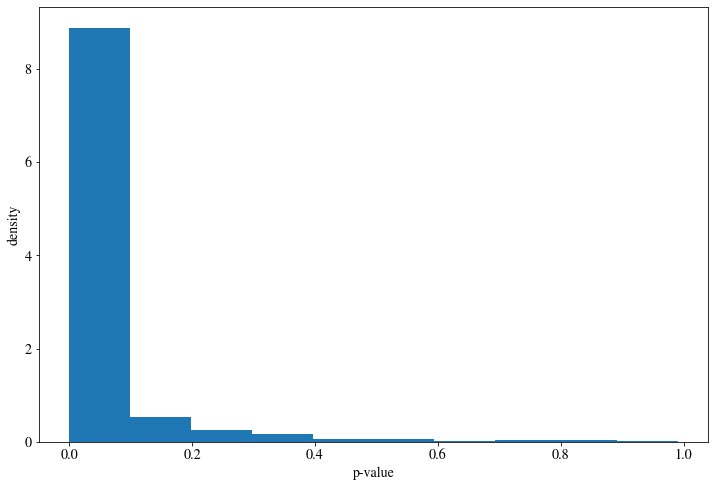

In [56]:
plt.figure(figsize = (12, 8))
plt.hist(p_values, density=True)
plt.xlabel('p-value'), plt.ylabel('density')
plt.savefig('p_values.png', fmt='png')

In [57]:
np.sum(p_values < 0.001)/len(p_values), np.sum(p_values < 0.01)/len(p_values), np.sum(p_values < 0.05)/len(p_values)

(0.5532378580323786, 0.7073474470734745, 0.8346824408468244)

In [58]:
np.sum(test_p_values < 0.001)/len(test_p_values), np.sum(test_p_values < 0.01)/len(test_p_values), np.sum(test_p_values < 0.05)/len(test_p_values)

(0.0012453300124533001, 0.008717310087173101, 0.05292652552926526)

Plot both test and actual plots:

<ipython-input-59-ee1d03c7f0de>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('p_values_umap_test.png', fmt='png')


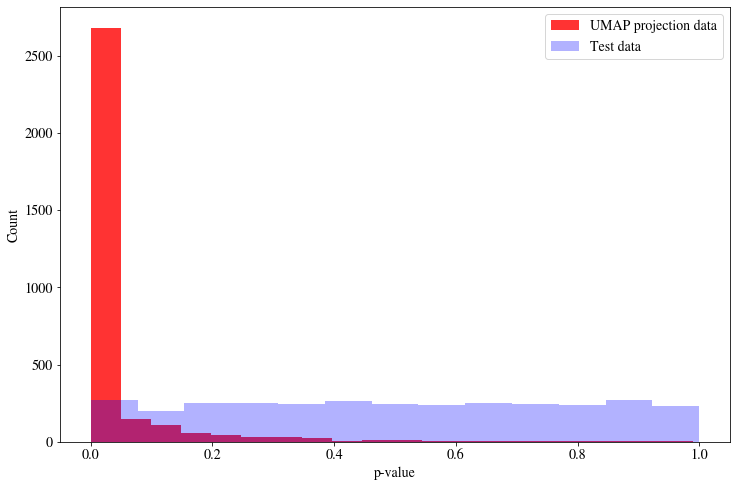

In [59]:
# fig, p_ax = plt.subplots(1, 2, figsize = (24, 8))
# # actual data
# p_ax[0].hist(p_values, density=False, label = 'UMAP projection data')
# p_ax[0].set_xlabel('p-value')
# p_ax[0].set_ylabel('Frequency')
# # test data
# p_ax[1].hist(test_p_values, c='o', density=False, label = 'Test data')
# p_ax[1].set_xlabel('p-value')
# p_ax[1].set_ylabel('Frequency')

plt.figure(figsize = (12, 8))

plt.hist(p_values, bins = 'doane', ls='dashed', lw=3, fc=(1, 0, 0, 0.8), label = 'UMAP projection data')
plt.hist(test_p_values, bins = 'doane', ls='dotted', lw=3, fc=(0, 0, 1, 0.3), label = 'Test data')
plt.xlabel('p-value'), plt.ylabel('Count')
plt.legend(loc='upper right')
plt.savefig('p_values_umap_test.png', fmt='png')
plt.show()

In [60]:
np.argsort(p_values)

array([2806, 2971,  890, ...,  308, 2169, 3195])

Pretty skewed towards $0$ overall...

Test individual points here:

In [61]:
index = 2971  # test individual data points (xvecs) here
# xy points
xy_points = np.array(list(zip(umap_xs.T, umap_ys.T)))  # this is the vector of xy points

point = xy_points[index]
mu_point = np.mean(point, axis=1)
mu_point
chi2s_point = np.array([(xvec - mu_point) @ np.linalg.inv(covs[index]) @ (xvec - mu_point).T for xvec in point.T])
stats.ks_1samp(x=chi2s_point, cdf=stats.chi2.cdf, args=[df])

KstestResult(statistic=0.7360560378243364, pvalue=4.975489600138756e-56)

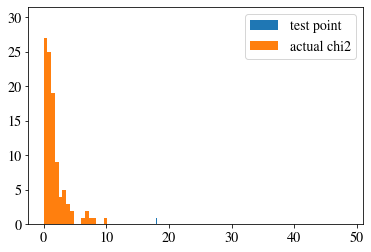

In [62]:
plt.hist(chi2s_point, bins='fd', label = 'test point')
plt.hist((stats.chi2.rvs(size=100, random_state=2, df=2)), bins='fd', label = 'actual chi2')
plt.legend()

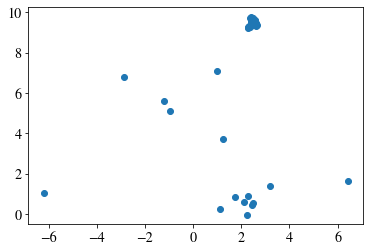

In [63]:
plt.scatter(umap_xs[:,index], umap_ys[:,index])

pytorch
tensorflow

activation functions
backpropagation (chain rule)

nn basics (josh's post)

vae (blog post)


tutorials

tensorflow tutorials
